### Exploratory Data Analysis and Preprocessing
EDA is a process of understanding the data that is provided to us for solving the model. Understand the hidden pattern, questions and answers in the data.

#### Preprocessing and cleaning
    
    1. Handle missing values
    2. Handle outliers
    3. Handle skeweness
    4. Handle Categorical Data
    5. Feature engineering

In [1]:
# Libraries required for dealing with EDA and preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Handling missing values

In [2]:
# Nan values check
np.nan

nan

In [3]:
# creating a dataframe to handle missing values
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,np.nan,85]
science = [78,75,np.nan,np.nan,76]

dic = {"name":name,"math":math,"science":science}

df = pd.DataFrame(dic)

df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [4]:
# Checking null values:
print(df.isnull().sum())

# Dropping the null values using dropna function
# this will drop rows having null values
df.dropna()

name       0
math       1
science    2
dtype: int64


,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [5]:
# dropping columns having null values:
df.dropna(axis=1)

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


In [6]:
 # dropping a particular row 
df.drop(2)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [7]:
# dropping multiple rows together
df.drop([2,3])

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [8]:
# droppping columns
df.drop("math", axis=1)

,name,science
0,john,78.0
1,jack,75.0
2,jill,NaN
3,kenny,NaN
4,kevin,76.0


In [9]:
# Filling null values
df.fillna(0)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,0.0
3,kenny,0.0,0.0
4,kevin,85.0,76.0


In [10]:
math_mean = df["math"].mean()
science_mean = df['science'].mean()

In [11]:
df['math'].fillna(math_mean, inplace=True)
df["science"].fillna(science_mean, inplace=True)

In [12]:
cars = pd.read_csv("cars.csv")
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [15]:
#Checking for null values in the data
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
# We observe that there are no null values that's why we check the datatypes of each column
# ancd check for data in the columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [16]:
# we observe that the values of normalized-losses doesn't match the datatype
# we check the valuecounts
cars["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
104     6
128     6
134     6
65      5
94      5
74      5
102     5
103     5
168     5
95      5
85      5
148     4
106     4
93      4
118     4
122     4
115     3
137     3
101     3
83      3
154     3
125     3
197     2
192     2
108     2
164     2
153     2
81      2
119     2
113     2
188     2
145     2
87      2
129     2
194     2
110     2
158     2
89      2
121     1
77      1
231     1
186     1
256     1
90      1
78      1
107     1
142     1
98      1
Name: normalized-losses, dtype: int64

In [17]:
# Here we have found junkn value ?, so we replace it with np.nan
cars["normalized-losses"].replace("?",np.nan,inplace=True)

In [18]:
# converting the column into float type
cars["normalized-losses"] = cars["normalized-losses"].astype(float)

In [19]:
# replacing the np.nan with mean
cars["normalized-losses"].fillna(cars["normalized-losses"].mean(),inplace=True)

In [20]:
cars["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
101     6
160     6
62      6
114     6
88      6
82      5
84      5
145     5
76      5
97      5
102     5
86      4
123     4
111     4
92      4
121     3
152     3
73      3
182     3
85      3
90      3
207     3
162     2
56      2
176     2
112     2
?       2
161     2
100     2
156     2
94      2
52      2
155     2
184     2
48      1
142     1
58      1
64      1
175     1
140     1
120     1
78      1
143     1
60      1
288     1
72      1
262     1
154     1
106     1
134     1
55      1
115     1
200     1
135     1
Name: horsepower, dtype: int64

In [21]:
cars["horsepower"].replace("?",np.nan,inplace=True)

In [22]:
cars["horsepower"] = cars["horsepower"].astype(float)

In [23]:
cars["horsepower"].fillna(cars["horsepower"].mean(),inplace=True)

In [24]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


### 2. Removing Outliers

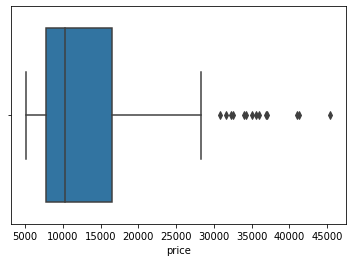

In [25]:
sns.boxplot(data=cars, x="price")
plt.show()

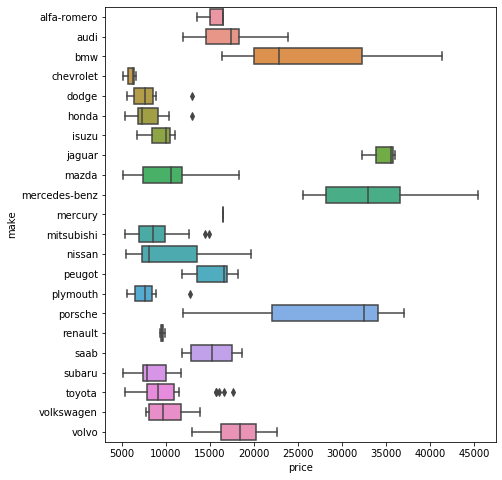

In [30]:
# in the above diagram that all the values above 28000 are outliers which isn't correct 
# therefore we plot price vs make
plt.figure(figsize=(7,8))
sns.boxplot(data=cars,x="price",y="make")
plt.show()

In [27]:
# checking outliers for isuzu make
cars[(cars["make"]=="isuzu") & (cars["price"] > 20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [28]:
# dropping record of outliers
cars.drop(45,inplace=True)

In [29]:
cars[(cars["make"]=="plymouth") & (cars["price"] > 12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [31]:
cars.drop(124,inplace=True)

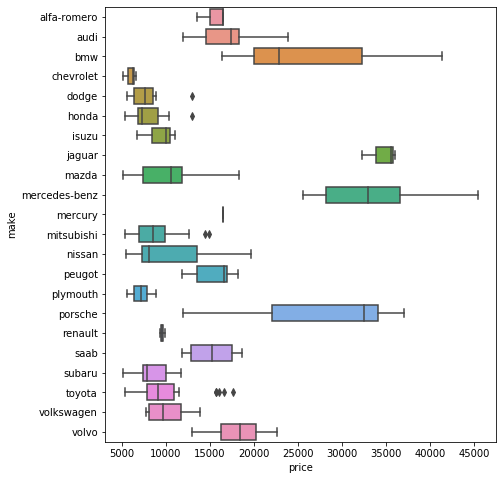

In [32]:
plt.figure(figsize=(7,8))
sns.boxplot(data=cars,x="price",y="make")
plt.show()

### 3. Handling categorical data

In [33]:
# Seperating categorical data and numerical data
cars_cat = cars.select_dtypes(object)
cars_num = cars.select_dtypes(["float64","int64"])

In [34]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [35]:
cars_cat["fuel-type"].value_counts()

gas       183
diesel     20
Name: fuel-type, dtype: int64

In [36]:
# One hot encoding
fuel_data = pd.get_dummies(cars_cat["fuel-type"])
fuel_data.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
make_data = pd.get_dummies(cars_cat["make"])
make_data.head()

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# challenge of one hot encoding is it will create too many columns
# therefore we use LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
# this step shall generate the Labels
le.fit(cars_cat["make"])
print(le.classes_)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


In [43]:
# this will transform the above classes into numbers
data = le.transform(cars_cat["make"])
data

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21])

In [44]:
# converts the numbers into labels
le.inverse_transform(data)

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw',
       'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet',
       'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge',
       'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar', 'jaguar',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mercedes-benz', 'mercedes-benz',
       'mercedes-benz', 'mercedes-benz', 'mercedes-benz', 'mercedes-benz',
       'mercedes-benz', 'mercedes-benz', 'mercury', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mit

In [45]:
for col in cars_cat:
    le = LabelEncoder()
    # fit transform generates the classes as well as transforms the data
    cars_cat[col] = le.fit_transform(cars_cat[col])
    print(col, " : ", le.classes_)
cars_cat.head()

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['diesel' 'gas']
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
['4wd' 'fwd' 'rwd']
['front' 'rear']
['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']


,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


### 4. Reducing Skewness

It is measure of asymetry

In [46]:
cars_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [48]:
from scipy.stats import skew

symboling skewness:  0.8443855299694787


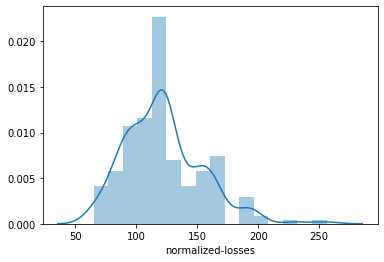

----------------------------------------
normalized-losses skewness:  0.8443855299694787


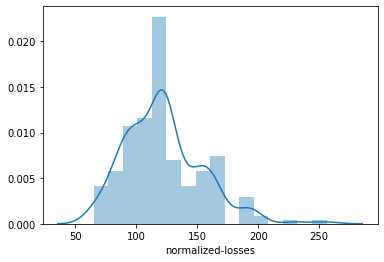

----------------------------------------
width skewness:  0.8443855299694787


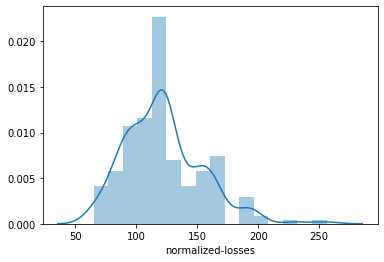

----------------------------------------
height skewness:  0.8443855299694787


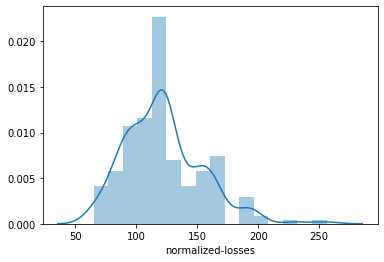

----------------------------------------
engine-size skewness:  0.8443855299694787


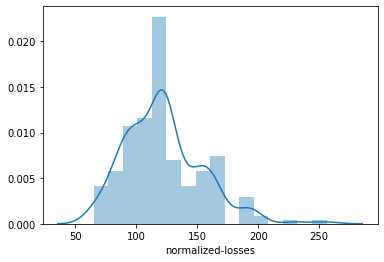

----------------------------------------
horsepower skewness:  0.8443855299694787


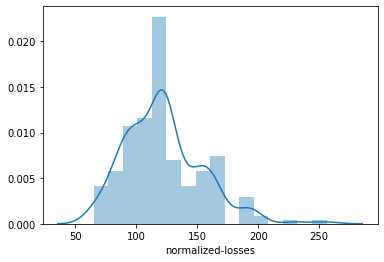

----------------------------------------
city-mpg skewness:  0.8443855299694787


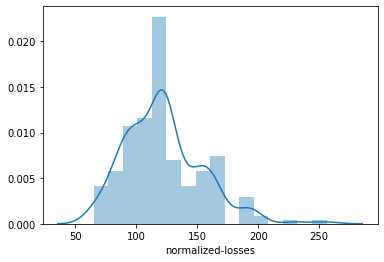

----------------------------------------
highway-mpg skewness:  0.8443855299694787


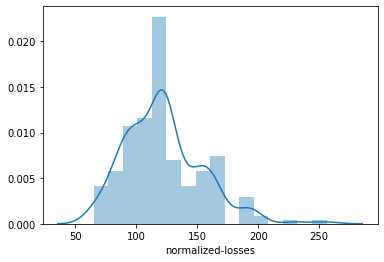

----------------------------------------
price skewness:  0.8443855299694787


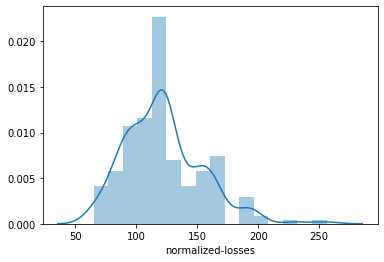

----------------------------------------


In [49]:
for col in cars_num:
    try:
        plt.figure()
        print(col, "skewness: ",skew(cars_num["normalized-losses"]))
        sns.distplot(cars_num["normalized-losses"])
        plt.show()
    except:
        pass
    print("----------------------------------------")

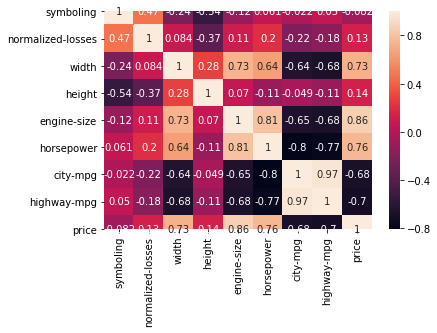

In [50]:
sns.heatmap(cars_num.corr(), annot=True)
plt.show()

In [51]:
# Reduce or remove skewness for only does columns 
# that don't have corelation with target
# from heat map we understand there is no relation 
# of price with symboling and normalized-losses
# Removing skewness 
cars_num["normalized-losses"] = np.sqrt(cars_num["normalized-losses"])

skewness:  0.42362644855543496


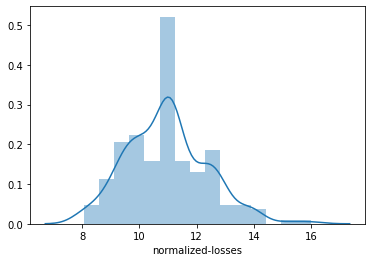

In [52]:
print("skewness: ",skew(cars_num["normalized-losses"]))
sns.distplot(cars_num["normalized-losses"])
plt.show()

In [53]:
# symboling has skewness therefore we shall not apply 
# skewness on symboling cz any sqrt or log on a negative
# number returns nan as shown below
print(np.log(-1))
print(np.sqrt(-10))

nan
nan


In [57]:
cars_new = pd.concat([cars_num, cars_cat], axis=1)
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,11.045361,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,11.045361,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,11.045361,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,12.806248,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,12.806248,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


### 5. Scaling

In [58]:
n1 = 1000 #m
n2 = 20 #km

n1 < n2

False

In [59]:
from sklearn.preprocessing import MinMaxScaler
# x_new = (x_old - min) / (max-min)
# all the data will be scaled down between 0 to 1

In [67]:
mm = MinMaxScaler()
mm.fit_transform(cars_new[["normalized-losses"]])

array([[0.37581256],
       [0.37581256],
       [0.37581256],
       [0.59764988],
       [0.59764988],
       [0.37581256],
       [0.56786265],
       [0.37581256],
       [0.56786265],
       [0.37581256],
       [0.72994921],
       [0.72994921],
       [0.7116698 ],
       [0.7116698 ],
       [0.37581256],
       [0.37581256],
       [0.37581256],
       [0.37581256],
       [0.37009796],
       [0.23145589],
       [0.11813715],
       [0.352811  ],
       [0.352811  ],
       [0.352811  ],
       [0.51693129],
       [0.51693129],
       [0.51693129],
       [0.51693129],
       [0.30560714],
       [0.50131847],
       [0.45887635],
       [0.45887635],
       [0.25040091],
       [0.25040091],
       [0.25040091],
       [0.30560714],
       [0.09694232],
       [0.28136116],
       [0.28136116],
       [0.14579545],
       [0.14579545],
       [0.14579545],
       [0.28746495],
       [0.37581256],
       [0.37581256],
       [0.37581256],
       [0.50131847],
       [0.375

In [72]:
cars_mx = cars_new.copy()
for col in cars_mx:
    mx = MinMaxScaler()
    cars_mx[col] = mx.fit_transform(cars_mx[[col]])
cars_mx.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.207959,0.000000,1.0,0.00,1.0,0.0,0.000000
1,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.282558,0.000000,1.0,0.00,1.0,0.0,0.000000
2,0.6,0.375813,0.433333,0.383333,0.343396,0.441667,0.166667,0.263158,0.282558,0.000000,1.0,0.50,1.0,0.0,0.833333
3,0.8,0.597650,0.491667,0.541667,0.181132,0.225000,0.305556,0.368421,0.219254,0.047619,1.0,0.75,0.5,0.0,0.500000
4,0.8,0.597650,0.508333,0.541667,0.283019,0.279167,0.138889,0.157895,0.306142,0.047619,1.0,0.75,0.0,0.0,0.500000


In [68]:
from sklearn.preprocessing import StandardScaler
# this implement the concept of Standarization
ss = StandardScaler()
ss.fit_transform(cars_num[["normalized-losses"]])

array([[ 0.06386822],
       [ 0.06386822],
       [ 0.06386822],
       [ 1.31702325],
       [ 1.31702325],
       [ 0.06386822],
       [ 1.1487557 ],
       [ 0.06386822],
       [ 1.1487557 ],
       [ 0.06386822],
       [ 2.06437979],
       [ 2.06437979],
       [ 1.96111972],
       [ 1.96111972],
       [ 0.06386822],
       [ 0.06386822],
       [ 0.06386822],
       [ 0.06386822],
       [ 0.03158655],
       [-0.75160004],
       [-1.39173556],
       [-0.06606723],
       [-0.06606723],
       [-0.06606723],
       [ 0.86104535],
       [ 0.86104535],
       [ 0.86104535],
       [ 0.86104535],
       [-0.33272094],
       [ 0.77284885],
       [ 0.53309404],
       [ 0.53309404],
       [-0.64457996],
       [-0.64457996],
       [-0.64457996],
       [-0.33272094],
       [-1.5114648 ],
       [-0.46968604],
       [-0.46968604],
       [-1.23549432],
       [-1.23549432],
       [-1.23549432],
       [-0.43520586],
       [ 0.06386822],
       [ 0.06386822],
       [ 0

In [73]:
cars_ss = cars_new.copy()
for col in cars_ss:
    ss = StandardScaler()
    cars_ss[col] = mx.fit_transform(cars_ss[[col]])
cars_ss.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.207959,0.000000,1.0,0.00,1.0,0.0,0.000000
1,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.282558,0.000000,1.0,0.00,1.0,0.0,0.000000
2,0.6,0.375813,0.433333,0.383333,0.343396,0.441667,0.166667,0.263158,0.282558,0.000000,1.0,0.50,1.0,0.0,0.833333
3,0.8,0.597650,0.491667,0.541667,0.181132,0.225000,0.305556,0.368421,0.219254,0.047619,1.0,0.75,0.5,0.0,0.500000
4,0.8,0.597650,0.508333,0.541667,0.283019,0.279167,0.138889,0.157895,0.306142,0.047619,1.0,0.75,0.0,0.0,0.500000


### 6. Feature Enginerring

In [74]:
# creating a new feature 
cars_new["size"] = cars["height"] * cars["width"]

In [75]:
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,size
0,3,11.045361,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0,3128.08
1,3,11.045361,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0,3128.08
2,1,11.045361,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5,3432.20
3,2,12.806248,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3,3594.66
4,2,12.806248,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3,3605.52
